**Modeling and Evaluation**

### Objectives

* Business requirements 2:
- The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew

### Inputs

* Data from test, train validation folders
* Image shape 

### Outputs

* Image augmentation
* Model creation
* Model training
* Save model
* Learning curve
* Model Evaluation
* Matrix
* Save evaluation
* Check prediction on new file

### Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import joblib

### Set working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/ML5-Mildew-Detection/jupyter_notebooks'

In [3]:
os.chdir('/workspace/ML5-Mildew-Detection')
print("You set a new current directory")

You set a new current directory


Double check directory set correctly

In [4]:
working_dir = os.getcwd()
working_dir

'/workspace/ML5-Mildew-Detection'

## Setting input directories

In [5]:
my_data_dir = 'inputs/cherryleaves_data/cherry-leaves'
training_path = my_data_dir + '/train' 
validation_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Setting output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


---

## Set labels

In [7]:
labels = os.listdir(training_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


### Image shape

In [8]:
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

Count number images in each folder

In [9]:
import plotly.express as px

df_freq = pd.DataFrame([])
for folder in ['train', 'test', 'validation']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Count': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images




Label Distribution

In [10]:


fig = px.bar(df_freq, 
            x="Set", 
            y="Count", 
            color='Label', 
            title="Cherry Leaves Dataset",
            barmode="group",
            text="Label")
fig.update_layout(
    autosize=False,
    width=900, 
    height=600, 
    )
fig.show()
fig.write_image(f'{file_path}/label_distribution.png')

---

Something to make in unique

## Image data augmentation

import ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Intiatize ImageDataGenerator


In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

### Batch size

In [13]:
batch_size = 16

### Augment training image set

In [15]:
train_set = augmented_image_data.flow_from_directory(training_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices
class_names_str = ", ".join(train_set.class_indices)

print(f"Classes: {class_names_str}")

Found 2944 images belonging to 2 classes.
Classes: healthy, powdery_mildew


### Augment Validation Dataset Images

In [17]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='categorical',
                                                          shuffle=False
                                                          )

validation_set.class_indices
class_names_str_1 = ", ".join(validation_set.class_indices)
print(f"Classes: {class_names_str_1}")

Found 420 images belonging to 2 classes.
Classes: healthy, powdery_mildew


### Augment Test Dataset Images

In [18]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False
                                                    )

test_set.class_indices
class_names_str_2 = ", ".join(test_set.class_indices)
print(f"Classes: {class_names_str_2}")

Found 844 images belonging to 2 classes.
Classes: healthy, powdery_mildew


### Plot augmented test images

(12, 256, 256, 3)


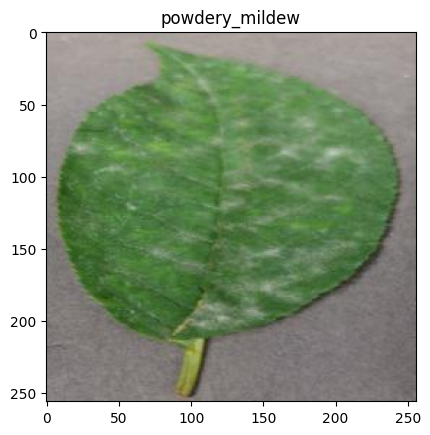

(16, 256, 256, 3)


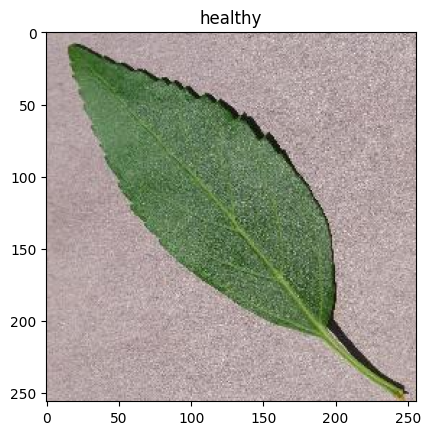

(16, 256, 256, 3)


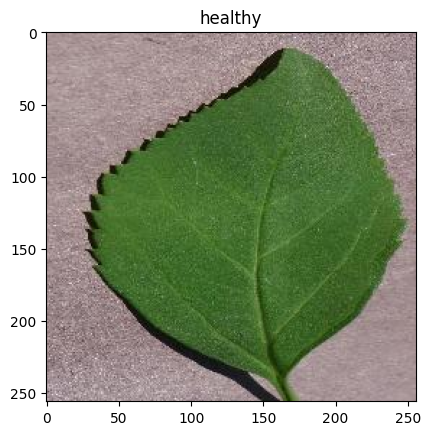

In [71]:
for _ in range(3):
    img, label = test_set.next()
    img_class = list(test_set.class_indices.keys())[np.argmax(label)]
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(img_class)
    plt.show()




### Plot augmented training image set

(16, 256, 256, 3)


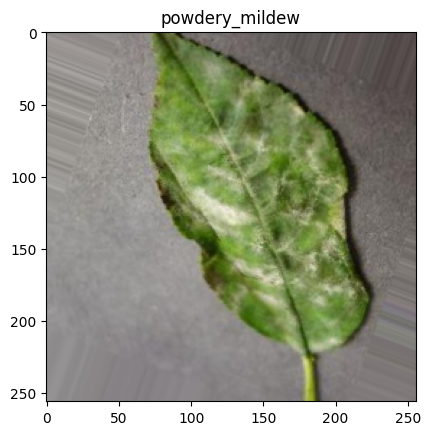

(16, 256, 256, 3)


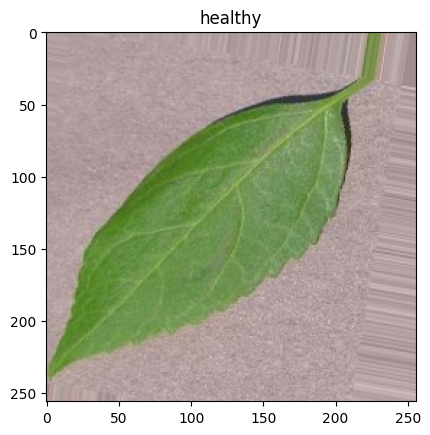

(16, 256, 256, 3)


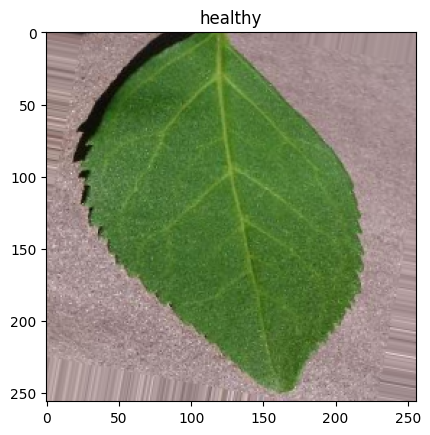

In [72]:
for _ in range(3):
    img, label = train_set.next()
    img_class = list(train_set.class_indices.keys())[np.argmax(label)]
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(img_class)
    plt.show()

### Augment validation image set

(16, 256, 256, 3)


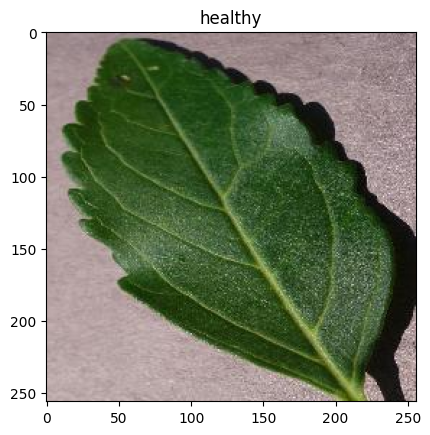

(16, 256, 256, 3)


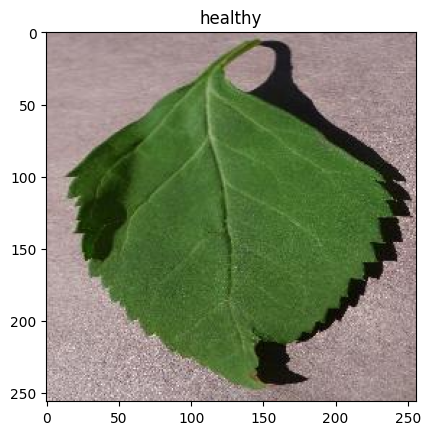

(16, 256, 256, 3)


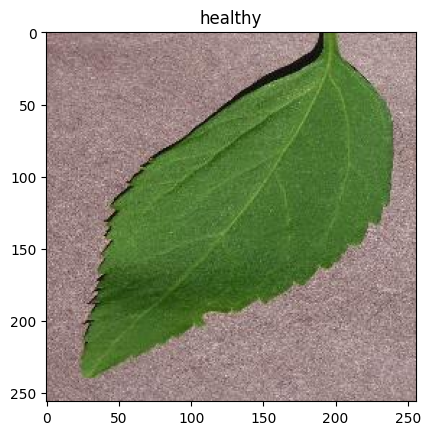

In [73]:
for _ in range(3):
    img, label = validation_set.next()
    img_class = list(validation_set.class_indices.keys())[np.argmax(label)]
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(img_class)
    plt.show()

### Save class_indices


In [74]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']